In [124]:
### three algorithms for computing prefix averages.

def prefix_average1(S):
    """Return list such that, for all j, A[j] equals average of S[0], ..., S[j]."""
    n = len(S)
    A = [0]*n
    for j in range(n):
        total = 0
        for i in range(j+1):
            total += S[i]
        A[j] = total / (j+1)
    return A

def prefix_average2(S):
    """Return list such that, for all j, A[j] equals average of S[0], ..., S[j]."""
    n = len(S)
    A = [0] * n
    for j in range(n):
        A[j] = sum(S[0:j+1]) / (j+1)
    return A

def prefix_average3(S):
    """Return list such that, for all j, A[j] equals average of S[0], ..., S[j]."""
    n = len(S)
    A = [0]*n
    total = 0
    for j in range(n):
        total += S[j]
        A[j] = total / (j+1)
    return A

# a small unit test
prefix_average1(range(10)) == prefix_average2(range(10))== prefix_average3(range(10))

True

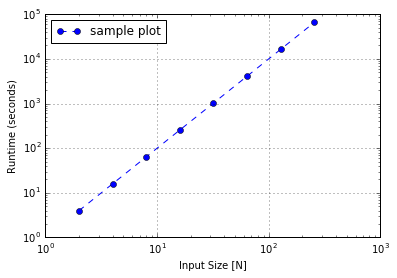

In [122]:
### You can use the following helper functions in your experiments.

import random
import time


def uniformInts(N, a, b):
    """Generate a list of N integers selected uniformly from range [a, b]
        N  size of the output array (i.e. the number of integers to be generated)
        a  lower bound of the random integer
        b  upper bound of the random integer
    
    Returns:
        A  array of N integers (a <= A[i] <= b)
    """
    # replace the 'pass' statement with your code
    A = [0]*N
    for i in range(N):
        A[i] = random.randint(a, b)
    return A

class Stopwatch:
    def __init__(self):
        self._creationTime = time.clock()
    def elapsedTime(self):
        return time.clock() - self._creationTime

### Use matplotlib to plot your runtime graph

import matplotlib.pyplot as plt
# this line tells iPython to show the plot inside the Notebook
%matplotlib inline

### Example of how to plot a log-log scale chart with x-axis X and y-axis Y

X = [2, 4, 8, 16, 32, 64, 128, 256]
Y = [x*x for x in X]

plt.plot(X, Y, 'bo--', label="sample plot")
plt.xlabel('Input Size [N]')
plt.ylabel('Runtime (seconds)')
plt.grid(True)
plt.legend(loc=2)   # put legend at the upper-right corner
plt.loglog()
plt.show()


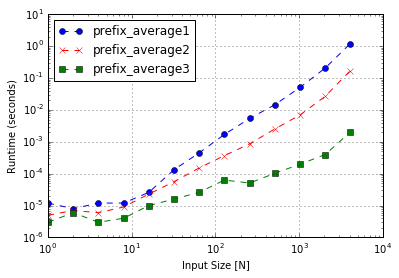

In [123]:
### TODO.P3 
# experimental analysis of prefix_average1, prefix_average2, prefix_average3
# measure running time of the three algorithms for 
# input size X=[1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096]


def measure_runtime(func, inputArg):
    """Execute a function func with an argurment inputArg.
    
    Returns:
        wall clock elapsed time of executing func.
    """
    watch = Stopwatch()
    func(inputArg)
    return watch.elapsedTime()

    
def runtime_tests(funcs, startX, endX):
    """Measure runtimes of all functions in funcs.
    
    startX lower bound of the input
    endX   upper bound of the input value
    
    Returns:
        X a list of input sizes
        Y corresponding runtime of func(X)
    """
    STEP = 2
    X = []
    Ys = []
    
    x = startX
    while x <= endX:
        
        S = uniformInts(x, 1, 100)

        X.append(x)
        
        for idx, func in enumerate(funcs):
            if len(Ys) < idx+1: 
                Ys.append([])
            Y = measure_runtime(func, S)
            Ys[idx].append(Y)
        
        x *= STEP
        
    return X, Ys

def visualize_runtimes(funcs, X, Ys):
    """Visualize runtimes (Ys) of each function in funcs as a function of X.
    
    funcs a list of functions to plot
    X input values
    Ys a list of runtime of each function in func    
    """

    line_types = ['--bo', '--rx', '--gs']

    for idx, func in enumerate(funcs):
        plt.plot(X, Ys[idx], line_types[idx], label=func.__name__)

    plt.xlabel('Input Size [N]')
    plt.ylabel('Runtime (seconds)')
    plt.grid(True)
    plt.legend(loc=2)   # put legend at the upper-right corner
    plt.loglog()
    plt.show()
    

def perform_runtime_analysis(begX, endX):    
    functions_to_test = [prefix_average1, prefix_average2, prefix_average3]
    X, Ys = runtime_tests(functions_to_test, begX, endX)
    visualize_runtimes(functions_to_test, X, Ys)

perform_runtime_analysis(1, 4*1024)